<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Zipf_Law_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Lab: Zipf Law**

# **Dicionário de Têrmos**

Crie um dicionário de têrmos (palavras) para a biografia da atriz **Kate Beckinsale**.

1. A primeira célula obtém o texto da biografia da atriz na variável `texto`.
2. Na segunda célula **adapte o código** para criar o dicionário de têrmos com a seguinte estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```
3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário

<img src="https://meusite.mackenzie.br/rogerio/kate_beckinsale.png" width=300, align="right">


# Scraping `url`

In [9]:
import requests
from bs4 import BeautifulSoup

url = 'https://pt.wikipedia.org/wiki/Kate_Beckinsale'

response = requests.get(url)

if response.status_code == 200:
    # Parse o conteúdo HTML da página com BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    main_content = soup.find('div', {'class': 'mw-parser-output'})

    text = []

    for paragraph in main_content.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6']):
        text.append(paragraph.get_text())

    for line in text:
        print(line)

else:
    print(f'Falha ao acessar a página. Response: {response.status_code}')


Kathrin Romany Beckinsale (Chiswick, 26 de julho de 1973) é uma atriz britânica. Depois de alguns papéis menores na televisão, ela estreou no cinema em Much Ado About Nothing (1993) enquanto ainda era estudante na Universidade de Oxford. Ela apareceu em dramas britânicos como Prince of Jutland (1994), Cold Comfort Farm (1995), Emma (1996) e The Golden Bowl (2000), além de várias produções teatrais e de rádio. Começou a procurar trabalhos cinematográficos nos Estados Unidos no final dos anos 90 e, depois de aparecer em dramas de pequena escala Os Últimos Dias de Disco (1998) e Brokedown Palace (1999), ela teve papéis principais no drama de guerra Pearl Harbor (2001), na comédia romântica Serendipity e Tiptoes (2003). Ela seguiu aqueles com aparições em The Aviator (2004) e Click (2006).

Desde que foi escalada como Selene na série de filmes Underworld (2003-2016), Beckinsale tornou-se conhecida principalmente por seu trabalho em filmes de ação, incluindo Van Helsing (2004), Whiteout (20

# Pré-processamento

In [10]:
for i in range(len(text)):
    text[i] = text[i].lower() # para unicidade
    text[i] = text[i].replace('\n','')
    text[i] = text[i].replace('.','')
    text[i] = text[i].replace(',','')
    text[i] = text[i].replace('(','')
    text[i] = text[i].replace(')','')
    text[i] = text[i].replace('?','')
    text[i] = text[i].replace('\'','') # elimina ' e "

print(text)


['kathrin romany beckinsale chiswick 26 de julho de 1973 é uma atriz britânica depois de alguns papéis menores na televisão ela estreou no cinema em much ado about nothing 1993 enquanto ainda era estudante na universidade de oxford ela apareceu em dramas britânicos como prince of jutland 1994 cold comfort farm 1995 emma 1996 e the golden bowl 2000 além de várias produções teatrais e de rádio começou a procurar trabalhos cinematográficos nos estados unidos no final dos anos 90 e depois de aparecer em dramas de pequena escala os últimos dias de disco 1998 e brokedown palace 1999 ela teve papéis principais no drama de guerra pearl harbor 2001 na comédia romântica serendipity e tiptoes 2003 ela seguiu aqueles com aparições em the aviator 2004 e click 2006', 'desde que foi escalada como selene na série de filmes underworld 2003-2016 beckinsale tornou-se conhecida principalmente por seu trabalho em filmes de ação incluindo van helsing 2004 whiteout 2009 contraband 2012 e total recall 2012 el

# Crie aqui seu dicionário

```
mydict
```

Aqui a 'cara' do dicionário...

In [11]:
mydict = {}                             # crie um dicionário vazio

for line in text:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(list(mydict.items())[:100])         # First 100

[('kathrin', 2), ('romany', 1), ('beckinsale', 75), ('chiswick', 2), ('26', 2), ('de', 232), ('julho', 2), ('1973', 2), ('é', 18), ('uma', 65), ('atriz', 6), ('britânica', 2), ('depois', 11), ('alguns', 3), ('papéis', 5), ('menores', 2), ('na', 25), ('televisão', 3), ('ela', 66), ('estreou', 2), ('no', 47), ('cinema', 4), ('em', 125), ('much', 2), ('ado', 2), ('about', 3), ('nothing', 4), ('1993', 3), ('enquanto', 13), ('ainda', 2), ('era', 9), ('estudante', 2), ('universidade', 6), ('oxford', 6), ('apareceu', 14), ('dramas', 2), ('britânicos', 2), ('como', 45), ('prince', 2), ('of', 5), ('jutland', 2), ('1994', 2), ('cold', 2), ('comfort', 2), ('farm', 2), ('1995', 6), ('emma', 6), ('1996', 2), ('e', 108), ('the', 23), ('golden', 1), ('bowl', 1), ('2000', 1), ('além', 2), ('várias', 2), ('produções', 2), ('teatrais', 1), ('rádio', 1), ('começou', 1), ('a', 66), ('procurar', 1), ('trabalhos', 1), ('cinematográficos', 1), ('nos', 3), ('estados', 1), ('unidos', 1), ('final', 2), ('dos', 

# Coloque seu dicionário no formato e um dataframe

In [12]:
import pandas as pd
df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)

In [13]:
df = df.sort_values('count',ascending=False).reset_index(drop=True)
df.head()

,word,count
0,de,232
1,em,125
2,e,108
3,o,101
4,que,88


# Plot a distribuição dos termos

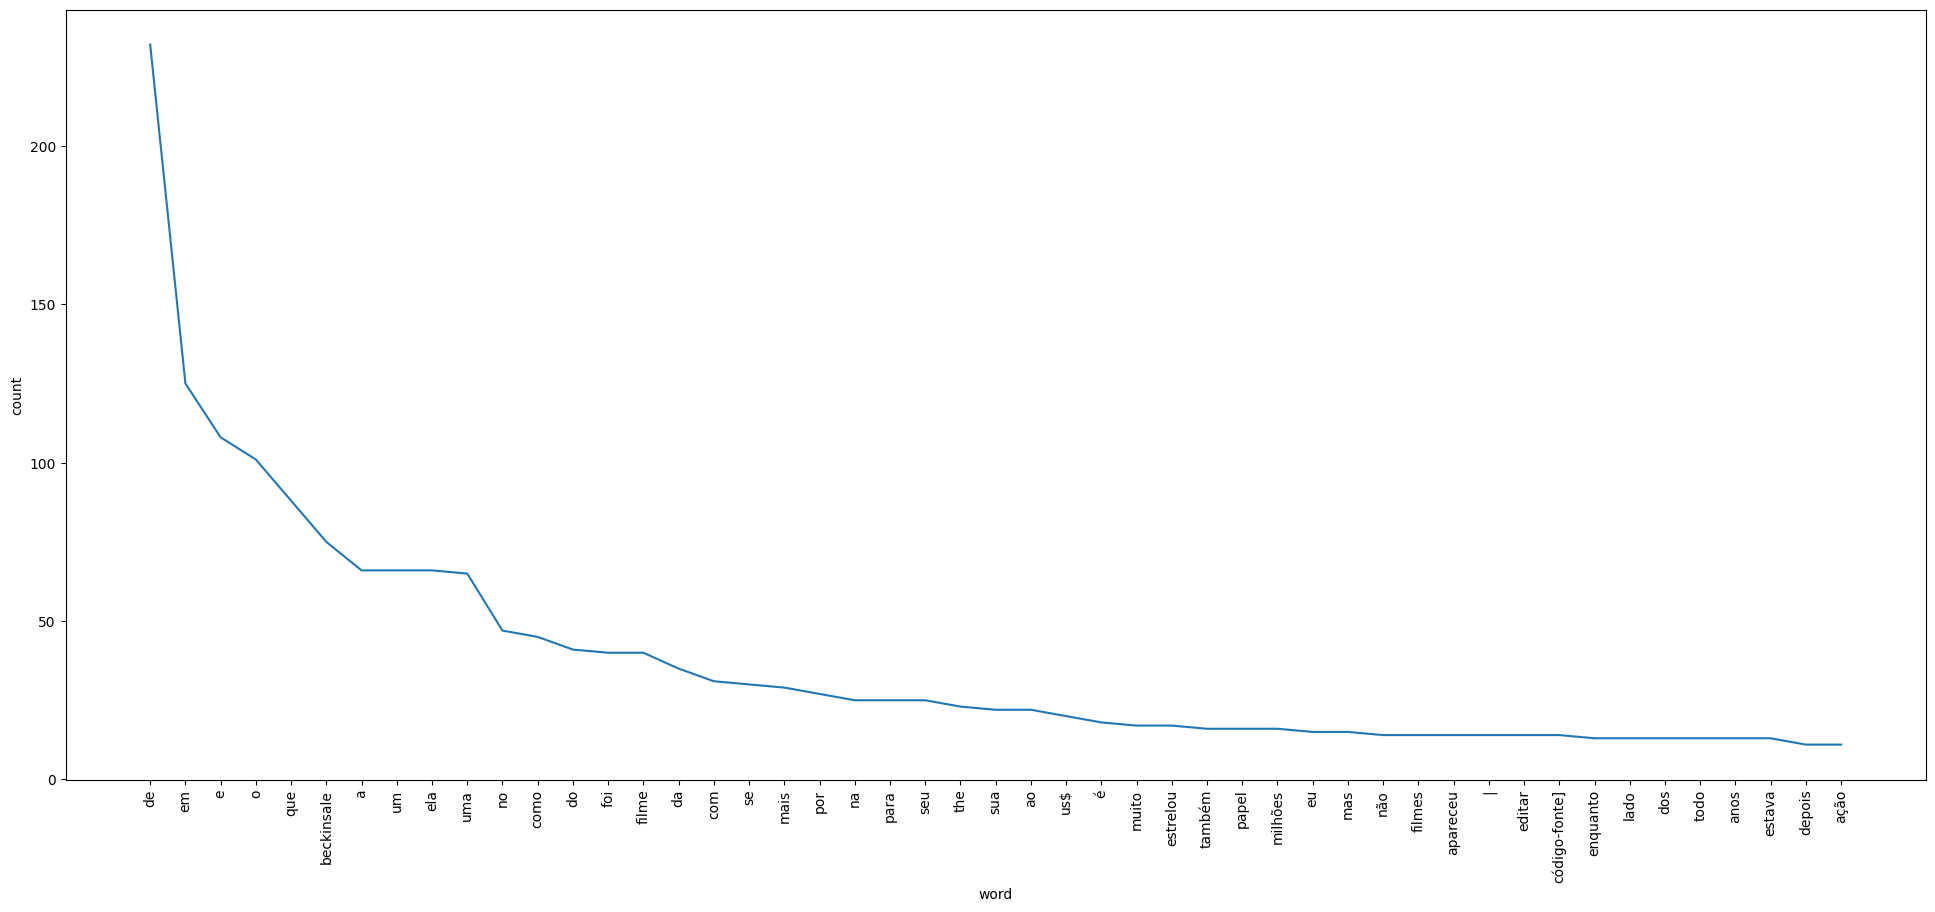

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(24,10))

sns.lineplot(x=df[df['count'] > 10].word,y=df[df['count'] > 10]['count'],ax=ax)
plt.xticks(rotation=90)
plt.show()

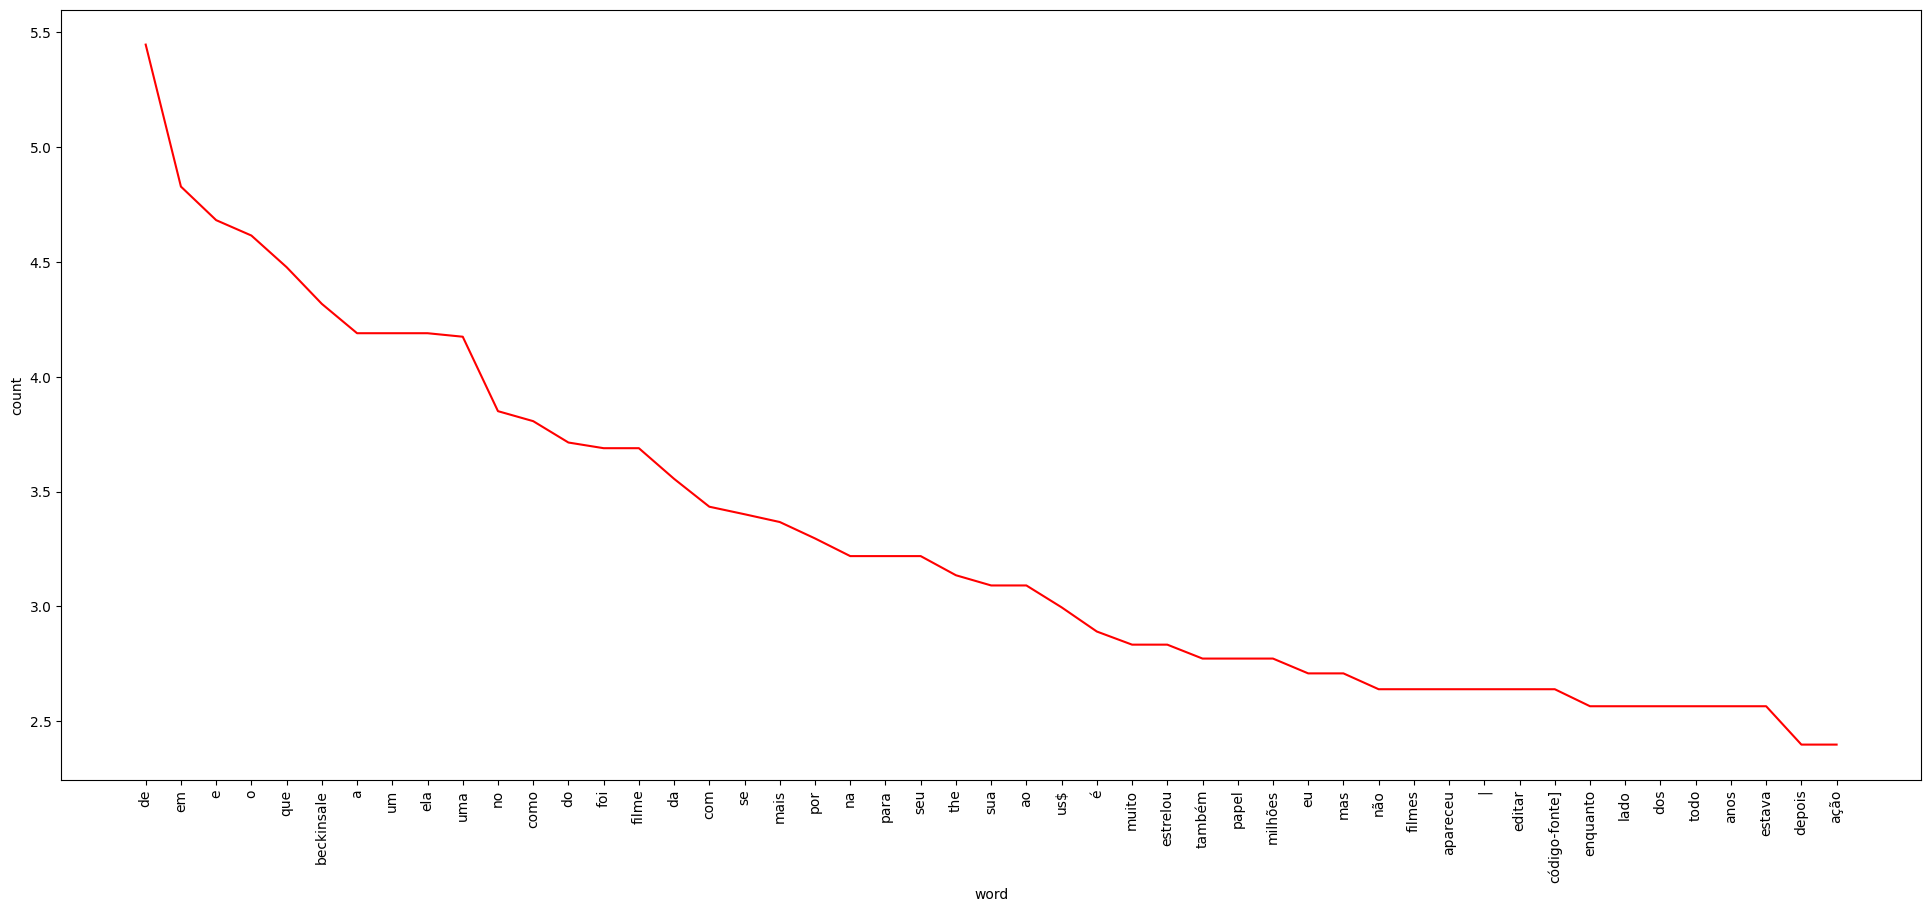

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(24,10))

sns.lineplot(x=df[df['count'] > 10].word,y=np.log(df[df['count'] > 10]['count']),ax=ax,color='r')
plt.xticks(rotation=90)
plt.show()

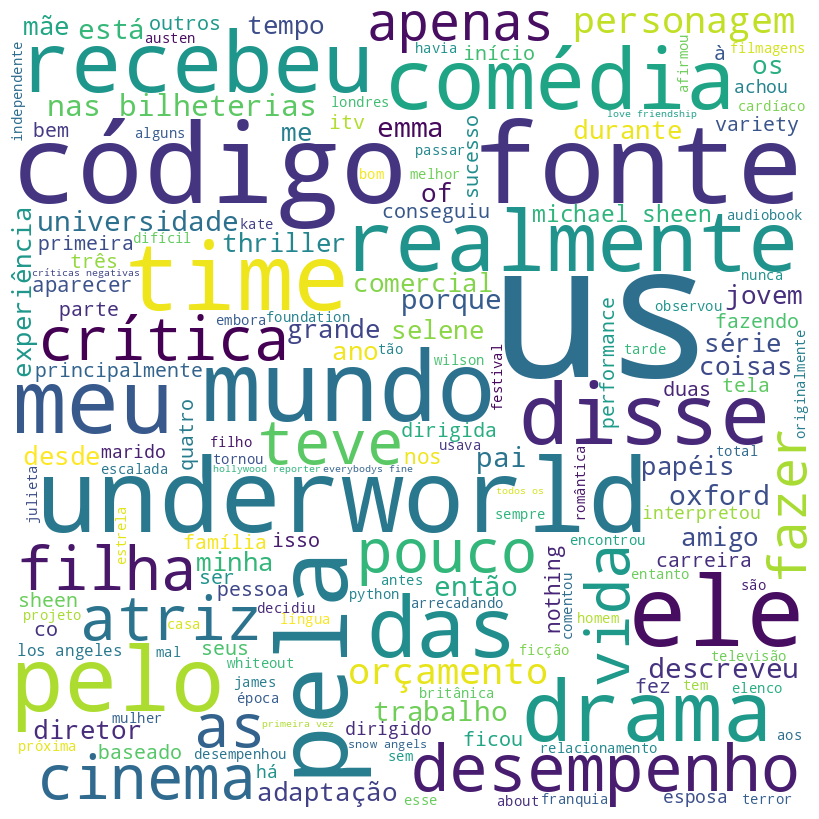

In [29]:
from wordcloud import WordCloud, STOPWORDS

# Python program to generate WordCloud

# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# stopwords = set(STOPWORDS)
# stopwords.update({'said','one'})
stopwords = set(df.word.head( 60 ))

texto_string = ''

for line in text:
  texto_string = texto_string + ' ' + line.lower()

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(texto_string)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


# Você pode tentar esses textos também...

In [31]:
import urllib.request  # the lib that handles the url stuff

text = []

# Moby-Dick, Hermann Melville
# https://www.gutenberg.org/files/15/15-0.txt
# Ulysses, James Joyce
# https://www.gutenberg.org/files/4300/4300-0.txt

# for line in urllib.request.urlopen('https://www.gutenberg.org/files/4300/4300-0.txt'):
for line in urllib.request.urlopen('https://www.gutenberg.org/files/15/15-0.txt'):
#   print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
    text.append(line.decode('utf-8'))

for line in text:
   print(line)

A saída de streaming foi truncada nas últimas 5000 linhas.
the creamy, sidelong-rushing sea.



The Manxman took the reel, and holding it high up, by the projecting

handle-ends of the spindle, round which the spool of line revolved, so

stood with the angular log hanging downwards, till Ahab advanced to

him.



Ahab stood before him, and was lightly unwinding some thirty or forty

turns to form a preliminary hand-coil to toss overboard, when the old

Manxman, who was intently eyeing both him and the line, made bold to

speak.



“Sir, I mistrust it; this line looks far gone, long heat and wet have

spoiled it.”



“’Twill hold, old gentleman. Long heat and wet, have they spoiled thee?

Thou seem’st to hold. Or, truer perhaps, life holds thee; not thou it.”



“I hold the spool, sir. But just as my captain says. With these grey

hairs of mine ’tis not worth while disputing, ’specially with a

superior, who’ll ne’er confess.”



“What’s that? There now’s a patched professor in Queen Na

## Luhn e Zipf Law e Ciência de Dados

A frequência de termos (quantidade que cada palavra aparece em um texto) tem grande importância em uma série de problemas envolvendo busca, classificação e sumarização automática de documentos.  

As palavras que um texto contêm e a frequencia delas pode muito bem dar uma pista do conteúdo do texto  

> Hans Peter Luhn (1957): **The weight of a term that occurs in a document is simply proportional to the term frequency**.

Entretanto parecem haver termos muito frequentes, como artigos, preposições etc. que parecem contribuir muito pouco para explicar o conteúdo de um texto.

> George Kingsley Zipf: **Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n.**

Isso ocorre em todo o texto de produção humana e, importante, em *qualquer língua*. Esse princípio é empregado desde para decifrar códigos e texto em linguas antigas, como em modernos sistemas de mineração de texto (*search engines*, bibliotecas digitais, classificação automática de conteúdo etc.).

Veja alguns textos famosos em diferentes línguas:  

In [ ]:
from IPython.display import IFrame
IFrame('https://demonstrations.wolfram.com/ZipfsLawAppliedToWordAndLetterFrequencies/', width='1000', height=600)